In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
sub = pd.read_csv('sample_submission_iA3afxn.csv')

In [6]:
train.shape , test.shape

((381109, 12), (127037, 11))

In [7]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [11]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
tgt_col = ['Response']
ign_cols = ['ID']
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns

In [13]:
print(tgt_col, ign_cols, cat_cols, num_cols,sep='\n')

['Response']
['ID']
Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')
Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [14]:
train[cat_cols].head(2)

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No


In [15]:
train[num_cols].head(2)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='count', ylabel='Vehicle_Age'>

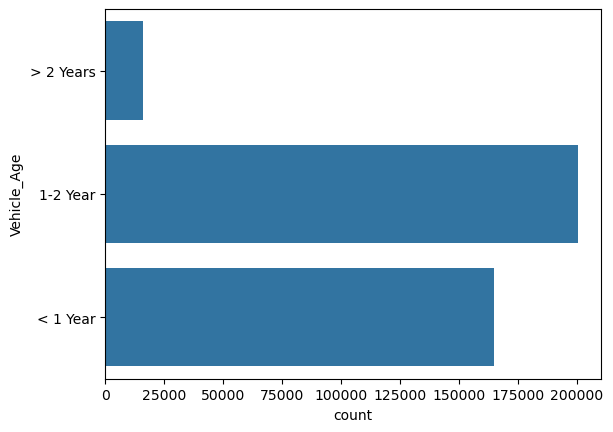

In [17]:
sns.countplot(data=train,y='Vehicle_Age')

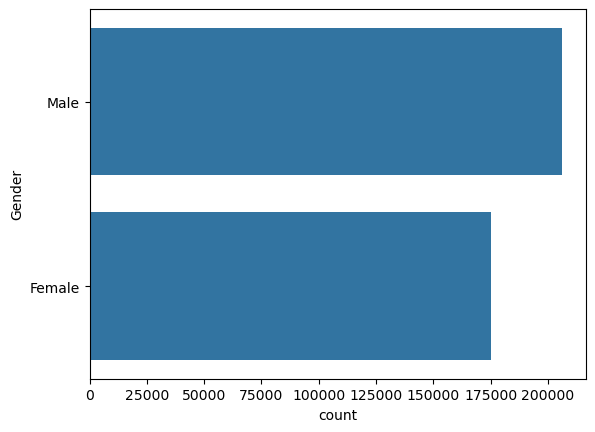

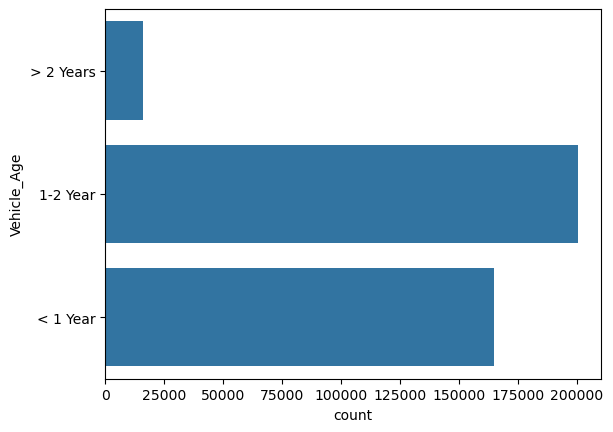

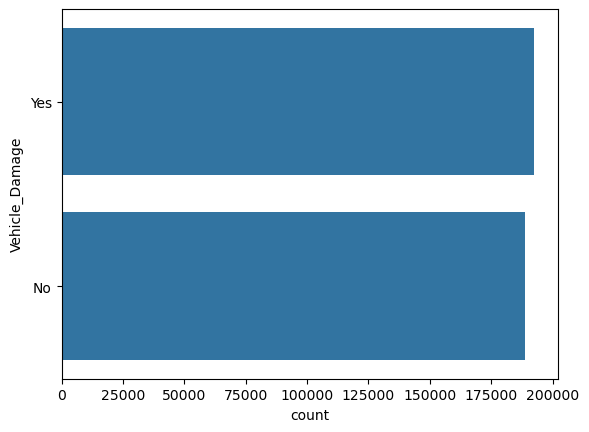

In [18]:
for col in train.select_dtypes(include='object').columns:
    sns.countplot(data=train,y=col)
    plt.show()

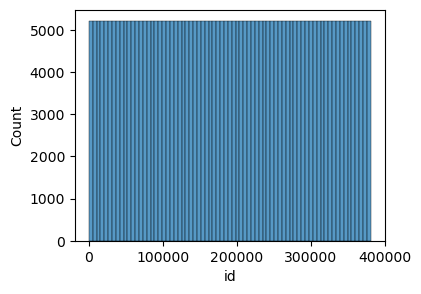

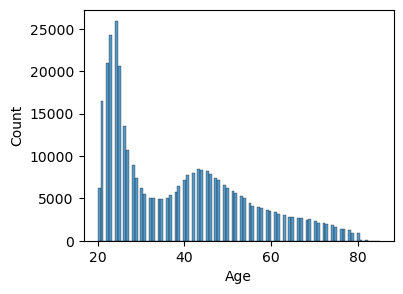

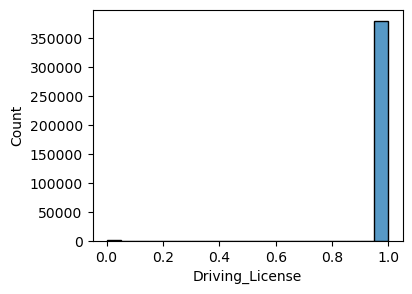

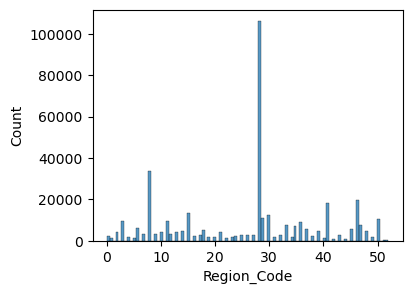

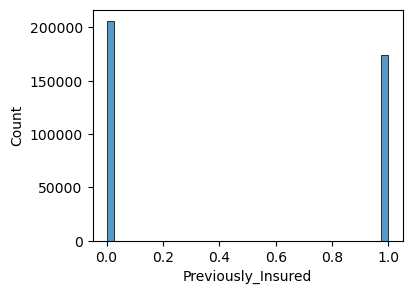

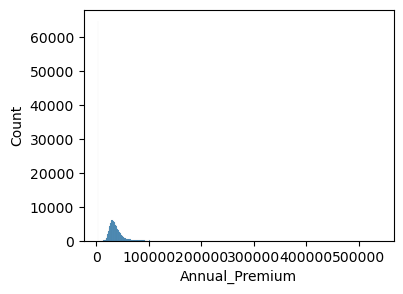

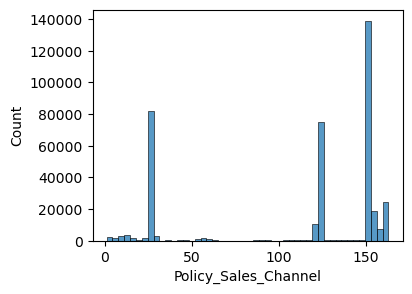

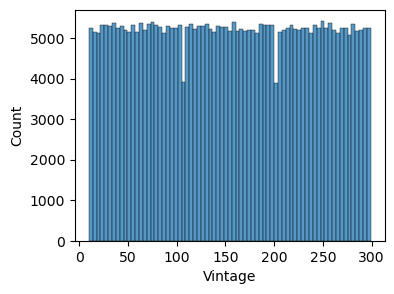

In [19]:
for col in train.drop(columns=['Response']).select_dtypes(exclude='object').columns:
    plt.figure(figsize=(4,3))
    sns.histplot(data=train,x=col)
    plt.show()

In [20]:
# preprocessing

In [21]:
train.duplicated().sum()

0

In [22]:
tgt_col = ['Response']
ign_cols = ['id ']
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns

In [23]:
print(tgt_col, ign_cols, cat_cols, num_cols,sep='\n')

['Response']
['id ']
Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')
Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [24]:
train[cat_cols].head(2)

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No


In [25]:
train[num_cols].head(2)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0


In [26]:
ign_cols = ['id'] 
num_cols = train.select_dtypes(exclude='object').drop(columns=ign_cols + tgt_col).columns
train[num_cols].head(2)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,1,28.0,0,40454.0,26.0,217
1,76,1,3.0,0,33536.0,26.0,183


In [27]:
# create pipeline to do preprocessing of category columns

In [28]:
cat_pipe_encode = Pipeline(
    steps = [
        ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
        ('ohe',OneHotEncoder(handle_unknown='ignore')) # category encoding
    ]
)

In [29]:
num_pipe_encode = Pipeline(
    steps = [
        ('impute_num',SimpleImputer(strategy='median')), # impute missing values
        ('scale', StandardScaler())  # standard scaler
    ]
)

In [30]:
preprocess = ColumnTransformer(
    transformers = [
        ('cat_encode', cat_pipe_encode, cat_cols),  # categorical columns
        ('num_encode', num_pipe_encode, num_cols)   # numerical columns
    ]
)

In [31]:
mymodel = LogisticRegression()

In [32]:
model_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', mymodel)  #modelling
    ]
)

In [33]:
X = train.drop(columns = ign_cols + tgt_col)
X.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183


In [34]:
y = train[tgt_col]
y.head(2)

,Response
0,1
1,0


In [35]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.1, random_state=42)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((342998, 10), (38111, 10), (342998, 1), (38111, 1))

In [36]:
train.shape, int(train.shape[0]*.9), int(train.shape[0]*.1)

((381109, 12), 342998, 38110)

In [37]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import f1_score

In [38]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [39]:
model_pipeline.predict(train_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
def model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline):
    pred_train = model_pipeline.predict(train_X)
    pred_val = model_pipeline.predict(val_X)
    
    print('Train F1 score:', f1_score(train_y, pred_train))
    print('Val   F1 score:', f1_score(val_y, pred_val))

In [41]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline)

Train F1 score: 0.0003337783711615487
Val   F1 score: 0.0


In [42]:
sub.head(2)

,id,Response
0,381110,0
1,381111,0


In [47]:
sub['Response'] = model_pipeline.predict(test)
sub.to_csv('submmissionone.csv',index=False)

In [48]:
import joblib

In [49]:
# create the pickle file
joblib.dump(model_pipeline, 'insurance_pipeline_model.pkl')

['insurance_pipeline_model.pkl']

In [50]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')